In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import missingno as msno


In [2]:
df = pd.read_csv("SBAnational.csv")
print(df.shape)
df.head()

/var/folders/s4/wkdjj13x2635cdbxl0dx7yv00000gn/T/ipykernel_45891/762392744.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SBAnational.csv")


(899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [4]:
df.describe(include='O')

,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,899150,899134,899150,897605,897598,899164,899164,894636,896582,162699,896796,899164,899164,897167,899164,899164,899164
unique,779583,32581,51,5802,56,9859,70,18,8,6448,8472,118859,15,2,83165,22128,38326
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,7-Jul-93,2006,N,N,13-Mar-10,31-Jul-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
freq,1269,11558,130619,86853,118116,1131,76040,420288,782822,734,10371,43787,899150,739609,737152,69394,49579


valeurs nulles : 
LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64


<Axes: >

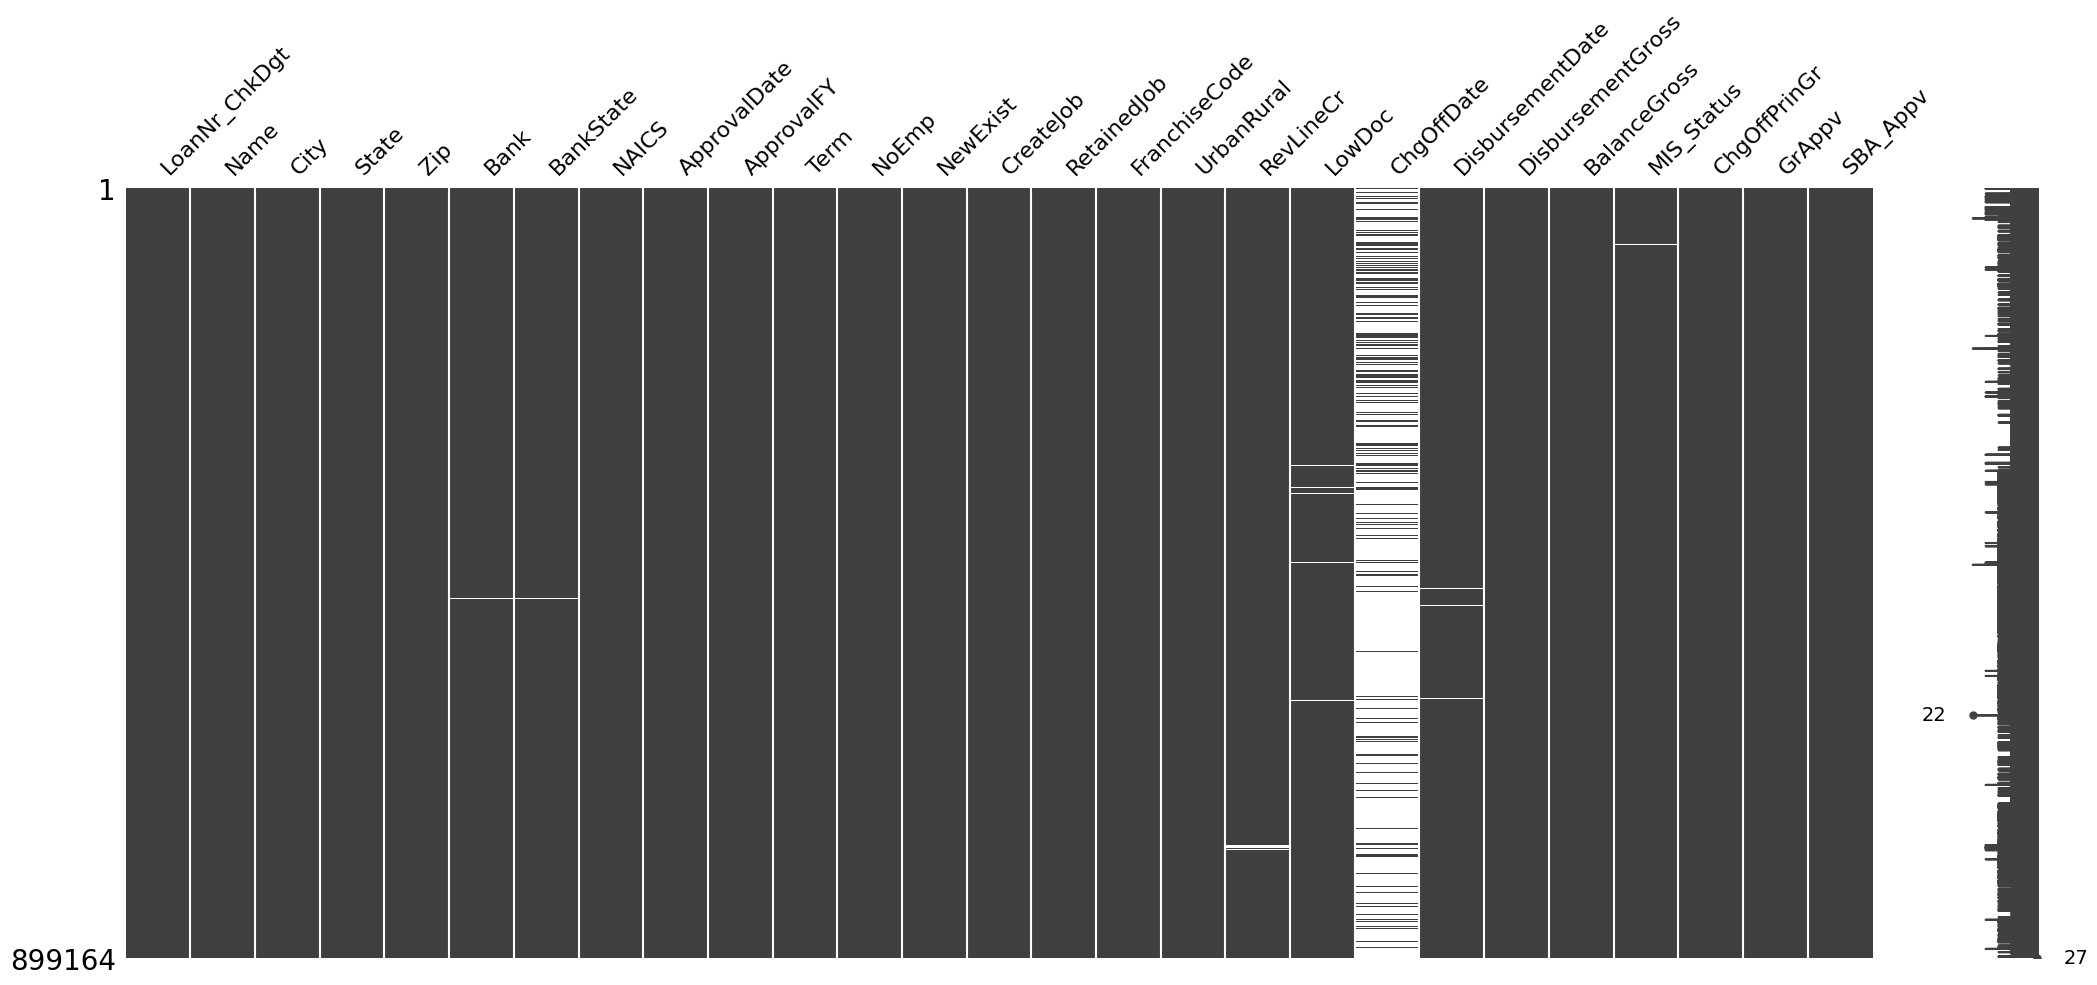

In [5]:
print("valeurs nulles : ")
print(df.isnull().sum())
msno.matrix(df)

In [6]:
print("nombre MIS_Status : ", df["MIS_Status"].unique().shape, df["MIS_Status"].unique())
print("nombre noms : ", df["Name"].unique().shape)
print("nombre de villes : ", df["City"].unique().shape)
print("nombre d'états : ", df["State"].unique().shape)
print("nombre de zip codes : ", df["Zip"].unique().shape)
print("nombre de valeurs urbanRural : ", df["UrbanRural"].unique().shape, df["UrbanRural"].unique())
print("nombre de banques : ", df["Bank"].unique().shape)
print("nombre de RetainedJob : ", df["RetainedJob"].unique().shape)
print("nombre de NAICS : ", df["NAICS"].unique().shape)
print("nombre de RevLineCr : ", df["RevLineCr"].unique().shape, df["RevLineCr"].unique())

naics_2_digits = df["NAICS"].astype(str).str[:2]
print("nombre de NAICS 2 premiers chiffres : ", naics_2_digits.unique().shape, naics_2_digits.unique())
print("nombre de valeurs dans NewExist : ", df["NewExist"].unique().shape, df["NewExist"].unique())


nombre MIS_Status :  (3,) ['P I F' 'CHGOFF' nan]
nombre noms :  (779584,)
nombre de villes :  (32582,)
nombre d'états :  (52,)
nombre de zip codes :  (33611,)
nombre de valeurs urbanRural :  (3,) [0 1 2]
nombre de banques :  (5803,)
nombre de RetainedJob :  (358,)
nombre de NAICS :  (1312,)
nombre de RevLineCr :  (19,) ['N' '0' 'Y' 'T' nan '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-'
 'Q']
nombre de NAICS 2 premiers chiffres :  (25,) ['45' '72' '62' '0' '33' '81' '23' '44' '42' '61' '53' '54' '31' '51' '71'
 '52' '21' '32' '56' '48' '11' '92' '22' '49' '55']
nombre de valeurs dans NewExist :  (4,) [ 2.  1.  0. nan]


In [7]:
print("Nombre de lignes avec NAICS = 0")
df[df["NAICS"] == 0].shape[0]

Nombre de lignes avec NAICS = 0


201948

# traitement valeurs nulles : 
- pour la target "MIS_Status" -> si ChgOffPrinGr (Montant du prêt déclaré en défaut (non remboursé).) == 0 donc MIS_Status = PIF sinon CHGOFF ✅
  - utiliser ChgOffDate car la corrélation est forte 0.98 
  
- pour "state" : essayer de déterminer le state à partir de la ville "city" ou du code postal "Zip"     ✅
  - créer 2 dictionnaires des City et Zip : city et zip comme clés pour chaque dictionnaire et le state comme valeur
  - déterminer les états manquants grace à ces 2 dictionnaires
  
- pour LowDoc : si le prêt est faible (GrAppv) (<$150,000) et après 1993, LowDoc = "Y" sinon non :      ✅
  - transformer les valeurs (0, 1, A, C, R, S)en null ;
    - GrvAppv < 150000 et année > 1993
  - donnees['LowDoc'] = np.where((donnees['GrAppv'] < 150000) & (donnees['ApprovalFY'] > 1990), 'Y', 'N')

  
- pour NewExists : on se base sur RetainedJob, on suppose que si l'entreprise va sauver des postes ça veut dire qu'elle existe déja. sinon utiliser le mode ✅
  - L'article fait la distinction entre deux choses différentes :
    - La variable originale NewExist dans le dataset :

      1 = Existing Business (entreprise existante > 2 ans)
      2 = New Business (nouvelle entreprise ≤ 2 ans)
      0 = Erreur de codage

    - Une nouvelle variable dummy "New" créée pour la régression logistique :

      Dummy New = 1 si l'entreprise a ≤ 2 ans
      Dummy New = 0 si l'entreprise a > 2 ans
      
  - On propose une approche qui consiste à remplacer les 0 par des 1
  - on remplace les 136 NaN par le mode

- pour RevLineCr : remplacer par le mode ? donnees['RevLineCr'] = donnees['RevLineCr'].fillna(donnees['RevLineCr'].mode()[0])
  - On remplace les valeurs invalides par des NaN :
    - donnees['RevLineCr'] = donnees['RevLineCr'].replace(['0', 'T', '1', 'R', '`', '2', 'C', ',', '3', '7', 'A', '5', '.', '4', '-', 'Q'], np.nan)
  - on se base sur le montant total du pret GrAppv, le montant total du prêt versé DisbursementGross pour déterminer les valeurs NaN ?  ✅

### remplacement :
- on remplace franchise code par un booléen : 0 pas de franchise, 1 franchise


# -----------------------------------------------------------------------

# Convertir les variables Objet (numériques) et int ou float
- ApprovalFY
- LowDoc
- DisbursementGross     Prix
- BalanceGross          Prix
- ChgOffPrinGr          Prix
- GrAppv                Prix
- SBA_Appv              Prix


In [8]:
df[["ApprovalFY", "LowDoc", "DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]].dtypes

ApprovalFY           object
LowDoc               object
DisbursementGross    object
BalanceGross         object
ChgOffPrinGr         object
GrAppv               object
SBA_Appv             object
dtype: object

In [9]:
print(df.columns)


Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')


In [10]:
df["ApprovalFY"].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

In [11]:
# colonne année
df["ApprovalFY"] = df["ApprovalFY"].astype(str).str.replace('A', '').astype(int)

# colonnes monétaires
for colonne in ["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"] :
    df[colonne] = df[colonne].str.replace('$', '').str.replace(',', '').astype(float)

# colonne LowDoc
df["LowDoc"] = np.where((df["GrAppv"] < 150000) & (df["ApprovalFY"] > 1993), "Y", "N")
df["LowDoc"] = df["LowDoc"].replace({"Y" : 1, "N" : 0})
# df['LowDoc'] = df['LowDoc'].map({'Y': 1, 'N': 0})


/var/folders/s4/wkdjj13x2635cdbxl0dx7yv00000gn/T/ipykernel_45891/1015700049.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["LowDoc"] = df["LowDoc"].replace({"Y" : 1, "N" : 0})


In [12]:
df[["ApprovalFY", "LowDoc", "DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]].dtypes

ApprovalFY             int64
LowDoc                 int64
DisbursementGross    float64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [13]:
# print(df.shape)
print(df.drop_duplicates().shape)
print("lignes dupliquées : ")
df[df.duplicated()]

(899164, 27)
lignes dupliquées : 


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


In [14]:
# corrélation entre chgoff_date et la target MIS_Status

df["has_chgoff_date"] = np.where(df["ChgOffDate"].isna(), 0, 1)
df["default"] = np.where(df["MIS_Status"] == "CHGOFF", 1, 0)

correlation = df["has_chgoff_date"].corr(df["default"])
print("corrélation entre ChgOffDate et MIS_Status:", correlation)

corrélation entre ChgOffDate et MIS_Status: 0.980300052941702


In [15]:
# donnees["MIS_Status"] = np.where(donnees["ChgOffDate"].notna(), "CHGOFF", "PIF")

df["MIS_Status"] = np.where(df["MIS_Status"].isna() & df["ChgOffDate"].notna(), "CHGOFF", df["MIS_Status"])
df["MIS_Status"] = np.where(df["MIS_Status"].isna() & df["ChgOffDate"].isna(), "P I F", df["MIS_Status"])

In [16]:
df["MIS_Status"].unique()

array(['P I F', 'CHGOFF'], dtype=object)

In [17]:
df["MIS_Status"].isna().sum()

0

# Variable NewExist : 

In [18]:
# correlation entre Newexist et RetainedJob
df["bool_RetainedJob"] = np.where(df["RetainedJob"] > 0, 1, 0)
df["bool_CreateJob"] = np.where(df["CreateJob"] > 0, 1, 0)
df["bool_NewExist"] = np.where(df["NewExist"] == 1, 1, 0)

correlations = df[["bool_NewExist", "bool_RetainedJob", "bool_CreateJob"]].corr()["bool_NewExist"]
print("Corrélations :", correlations)

Corrélations : bool_NewExist       1.000000
bool_RetainedJob    0.110240
bool_CreateJob     -0.043147
Name: bool_NewExist, dtype: float64


In [19]:
df.drop(["bool_RetainedJob", "bool_CreateJob", "bool_NewExist", "has_chgoff_date", "default"], inplace=True, axis=1)

Notre hypothèse est qu'il ya une corrélation entre RetainedJob (le nombre de jobs sauvés) et la variable NewExist
On regarde s'il existe une correlation

La corrélation est faible 0.110240 avec RetainedJob et -0.043147 avec CreateJob 
- Notre hypothèse n'est pas valide

On va procéder ainsi : 
- NewExist = 0 → il sera = 0 (Existing Business)
- on remplace les 136 valeurs nulles par le mode 


In [20]:
print("NewExist = 0 :", df[df["NewExist"] == 0].shape[0])
print("NewExist = 1 :", df[df["NewExist"] == 1].shape[0])
print("NewExist = 2 :", df[df["NewExist"] == 2].shape[0])

NewExist = 0 : 1034
NewExist = 1 : 644869
NewExist = 2 : 253125


In [21]:
df.loc[df["NewExist"] == 0, "NewExist"] = 1
mode_NewExist = df["NewExist"].mode()[0]
df["NewExist"] = df["NewExist"].fillna(mode_NewExist)

# variable State

In [22]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                    0
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [23]:
# Trier le DataFrame par "Code Postal" dans l'ordre croissant.
donnees_sorted = df.sort_values(by="Zip")

# Grouper le DataFrame par "Code Postal".
grouped = donnees_sorted.groupby("Zip")

# Remplir les valeurs nulles de "State" avec la valeur "State" non nulle correspondante dans chaque groupe.
donnees_sorted["State"] = grouped["State"].fillna(method="ffill")
df = donnees_sorted.sort_index()

/var/folders/s4/wkdjj13x2635cdbxl0dx7yv00000gn/T/ipykernel_45891/263612411.py:8: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  donnees_sorted["State"] = grouped["State"].fillna(method="ffill")
/var/folders/s4/wkdjj13x2635cdbxl0dx7yv00000gn/T/ipykernel_45891/263612411.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  donnees_sorted["State"] = grouped["State"].fillna(method="ffill")
/var/folders/s4/wkdjj13x2635cdbxl0dx7yv00000gn/T/ipykernel_45891/263612411.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [24]:
df.loc[df['State'].isnull()]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,...,N,0,18-Sep-93,16-Mar-88,50000.0,0.0,CHGOFF,30589.0,50000.0,45000.0


In [25]:
# On remplace les 2 valeurs nulles restantes de State par le BankState
# donnees[donnees["City"] == "LAKE OZARK"]
df["State"].fillna(df["BankState"], inplace=True)

/var/folders/s4/wkdjj13x2635cdbxl0dx7yv00000gn/T/ipykernel_45891/1159532449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["State"].fillna(df["BankState"], inplace=True)


In [26]:
df['State'].isnull().sum()

0

# variable LowDoc

In [27]:
df["LowDoc"].isna().sum()

0

In [28]:
df['LowDoc'] = np.where((df['GrAppv'] < 150000) & (df['ApprovalFY'] > 1993), 'Y', 'N')

In [29]:
df["LowDoc"].isna().sum()

0

In [30]:
df["LowDoc"].unique()

array(['Y', 'N'], dtype=object)

# variable RevLineCr

In [31]:
df["RevLineCr"].unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

In [32]:
df.loc[(df["RevLineCr"] != "Y") & (df["RevLineCr"] != "N"), "RevLineCr"] = np.nan

In [33]:
df[(df["RevLineCr"] == "Y") | (df["RevLineCr"] == "N")].shape

(621685, 27)

In [34]:
df.drop(["LoanNr_ChkDgt", "Name", "City", "Zip", "Bank", "BankState", "ApprovalDate", "RevLineCr", "ChgOffDate", "DisbursementDate", "BalanceGross", "ChgOffPrinGr"], axis=1, inplace=True)
df.isna().sum()

State                0
NAICS                0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
SBA_Appv             0
dtype: int64

In [35]:
df.dtypes

State                 object
NAICS                  int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                object
DisbursementGross    float64
MIS_Status            object
GrAppv               float64
SBA_Appv             float64
dtype: object

In [36]:
df.loc[df["MIS_Status"] == "P I F", "MIS_Status"] = 1
df.loc[df["MIS_Status"] == "P I F", "MIS_Status"]

Series([], Name: MIS_Status, dtype: object)

In [37]:
df.loc[df["MIS_Status"] == "CHGOFF", "MIS_Status"] = 0
df["MIS_Status"] = df["MIS_Status"].astype(int)
df.loc[df["MIS_Status"] == "CHGOFF", "MIS_Status"]


Series([], Name: MIS_Status, dtype: int64)

In [38]:
df["MIS_Status"].unique()
df.head()

,State,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
0,IN,451120,1997,84,4,2.0,0,0,1,0,Y,60000.0,1,60000.0,48000.0
1,IN,722410,1997,60,2,2.0,0,0,1,0,Y,40000.0,1,40000.0,32000.0
2,IN,621210,1997,180,7,1.0,0,0,1,0,N,287000.0,1,287000.0,215250.0
3,OK,0,1997,60,2,1.0,0,0,1,0,Y,35000.0,1,35000.0,28000.0
4,FL,0,1997,240,14,1.0,7,7,1,0,N,229000.0,1,229000.0,229000.0


In [39]:
df.isna().sum()

State                0
NAICS                0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
SBA_Appv             0
dtype: int64

In [40]:
df.dtypes

State                 object
NAICS                  int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                object
DisbursementGross    float64
MIS_Status             int64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [41]:
print(df.columns)  # Affiche toutes les colonnes présentes dans le DataFrame


Index(['State', 'NAICS', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'DisbursementGross', 'MIS_Status', 'GrAppv', 'SBA_Appv'],
      dtype='object')


# State

# LowDoc

In [42]:
# Transformation de la colonne LowDoc
df['LowDoc'] = df['LowDoc'].map({'Y': 1, 'N': 0})

# Vérification du résultat
print(df['LowDoc'].value_counts())


LowDoc
1    529934
0    369230
Name: count, dtype: int64


In [43]:
df.dtypes

State                 object
NAICS                  int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                 int64
DisbursementGross    float64
MIS_Status             int64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [44]:
# Transformation de la colonne LowDoc
df['State'] = df['State'].map({'IN': 0, 'OK': 1, 'FL': 2, 'CT': 3, 'NJ': 4, 'NC': 5, 'IL': 6, 'RI': 7, 'TX': 8, 'VA': 9, 'TN': 10, 
              'AR': 11, 'MN': 12, 'MO': 13, 'MA': 14, 'CA': 15, 'SC': 16, 'LA': 17, 'IA': 18, 'OH': 19, 'KY': 20, 'MS': 21, 
              'NY': 22, 'MD': 23, 'PA': 24, 'OR': 25, 'ME': 26, 'KS': 27, 'MI': 28, 'AK': 29, 'WA': 30, 'CO': 31, 'MT': 32, 
              'WY': 33, 'UT': 34, 'NH': 35, 'WV': 36, 'ID': 37, 'AZ': 38, 'NV': 39, 'WI': 40, 'NM': 41, 'GA': 42, 'ND': 43, 
              'VT': 44, 'AL': 45, 'NE': 46, 'SD': 47, 'HI': 48, 'DE': 49, 'DC': 50})

# Vérification du résultat
print(df['State'].value_counts())


State
15    130622
8      70462
22     57693
2      41213
24     35170
19     32622
6      29669
14     25272
12     24373
4      24036
30     23263
42     22277
40     21042
13     20679
31     20605
28     20545
34     18777
38     17631
5      14294
0      14132
23     13269
9      13264
3      12229
35     12109
18     11996
27     11465
25     11051
1       9950
17      9576
37      9498
10      9403
7       9028
32      8749
45      8362
39      8024
20      7723
21      7686
46      6386
11      6341
41      6033
26      5944
16      5597
44      5454
43      5245
47      4431
48      3610
36      3287
33      2839
29      2405
49      2220
50      1613
Name: count, dtype: int64


In [45]:
df.dtypes

State                  int64
NAICS                  int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
LowDoc                 int64
DisbursementGross    float64
MIS_Status             int64
GrAppv               float64
SBA_Appv             float64
dtype: object

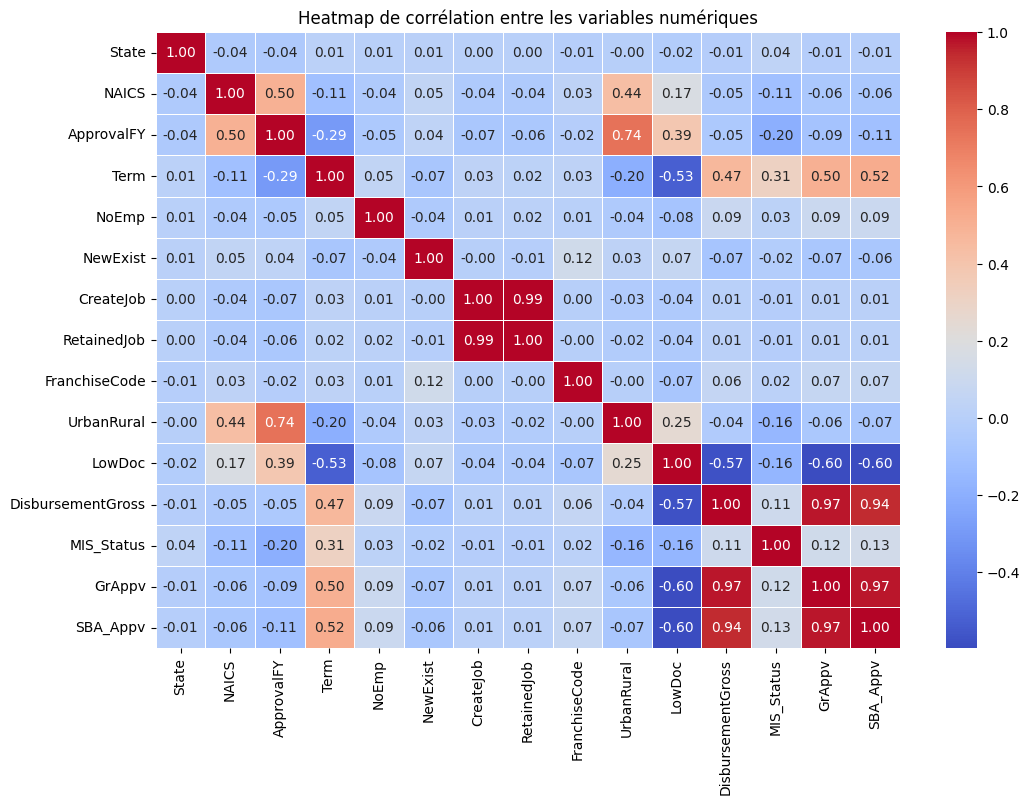

In [46]:

# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de corrélation entre les variables numériques")
plt.show()


In [47]:
# Analyse statistique descriptive
df.describe()

,State,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
count,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05
mean,19.377361,398660.950146,2001.143560,110.773078,11.411353,1.281511,8.430376,10.797257,2753.725933,0.757748,0.589363,2.011540e+05,0.824483,1.926870e+05,1.494888e+05
std,12.390497,263318.312760,5.913846,78.857305,74.108196,0.449737,236.688165,237.120600,12758.019136,0.646436,0.491950,2.876408e+05,0.380409,2.832634e+05,2.284146e+05
min,0.000000,0.000000,1962.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02
25%,8.000000,235210.000000,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.200000e+04,1.000000,3.500000e+04,2.125000e+04
50%,15.000000,445310.000000,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+05,1.000000,9.000000e+04,6.125000e+04
75%,28.000000,561730.000000,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.380000e+05,1.000000,2.250000e+05,1.750000e+05
max,50.000000,928120.000000,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.000000,1.144632e+07,1.000000,5.472000e+06,5.472000e+06


In [48]:
# Enregistrer le DataFrame nettoyé dans un fichier CSV
df.to_csv('donnees_nettoyees.csv', index=False)
